In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a simple dataset
data = {
    'Ear shape': ['Pointy', 'Floppy', 'Floppy', 'Pointy', 'Pointy', 'Pointy', 'Floppy', 'Pointy', 'Floppy', 'Floppy'],
    'Face shape': ['Round', 'Not round', 'Round', 'Not round', 'Round', 'Round', 'Not round', 'Round', 'Round', 'Round'],
    'Whiskers': ['Present', 'Present', 'Absent', 'Present', 'Present', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent'],
    'Cat': [1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
}
df = pd.DataFrame(data)
df



,Ear shape,Face shape,Whiskers,Cat
0,Pointy,Round,Present,1
1,Floppy,Not round,Present,1
2,Floppy,Round,Absent,0
3,Pointy,Not round,Present,0
4,Pointy,Round,Present,1
5,Pointy,Round,Absent,1
6,Floppy,Not round,Absent,0
7,Pointy,Round,Absent,1
8,Floppy,Round,Absent,0
9,Floppy,Round,Absent,0


In [42]:
# Step 2: Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first')  # We drop one column to avoid multicollinearity
encoded_features = encoder.fit_transform(df[['Ear shape', 'Face shape', 'Whiskers']]).toarray()


In [43]:
# Step 3: Create a DataFrame for encoded features
encoded_feature_names = encoder.get_feature_names_out(['Ear shape', 'Face shape', 'Whiskers'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
encoded_df


,Ear shape_Pointy,Face shape_Round,Whiskers_Present
0,1.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,0.0
6,0.0,0.0,0.0
7,1.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [44]:
# Step 4: Combine with the target variable
X = encoded_df
y = df['Cat']


In [45]:
# Step 5: Create and train the Decision Tree Classifier with Entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy', random_state=42)

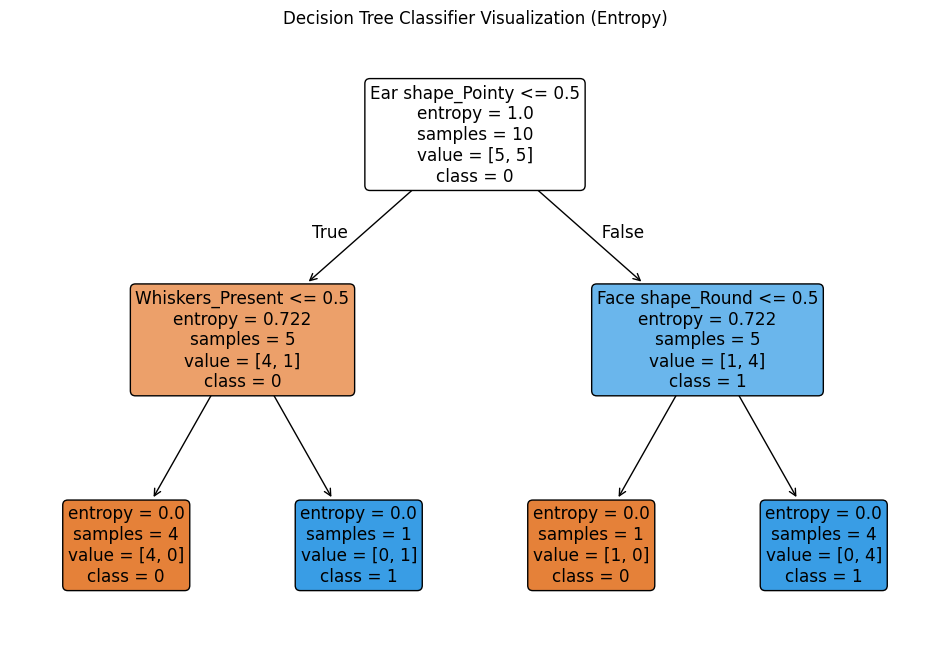

In [46]:
# Step 6: Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_.astype(str), filled=True, rounded=True)
plt.title("Decision Tree Classifier Visualization (Entropy)")
plt.show()


In [47]:
dt = pd.concat([encoded_df, df[['Cat']]], axis=1)
dt

,Ear shape_Pointy,Face shape_Round,Whiskers_Present,Cat
0,1.0,1.0,1.0,1
1,0.0,0.0,1.0,1
2,0.0,1.0,0.0,0
3,1.0,0.0,1.0,0
4,1.0,1.0,1.0,1
5,1.0,1.0,0.0,1
6,0.0,0.0,0.0,0
7,1.0,1.0,0.0,1
8,0.0,1.0,0.0,0
9,0.0,1.0,0.0,0


In [64]:
def calculate_entropy(class_counts):
    """
    Calculate the entropy of a dataset.

    Parameters:
        class_counts (list or array): The counts or probabilities of each class.

    Returns:
        float: The calculated entropy.
    """
    # Convert counts to probabilities if they aren't already
    total = sum(class_counts)
    probabilities = [count / total for count in class_counts]
    
    # Compute entropy
    entropy = -sum(p * np.log2(p) if p > 0 else 0 for p in probabilities)
    
    return entropy

def H(p1):
    entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
    return entropy




In [78]:
c = dt[(dt['Ear shape_Pointy'] == 0) & (dt['Cat'] == 0) & (dt['Whiskers_Present'] <= 0.5)].shape[0]
print(c)


4
